In [ ]:
# Install required Libraries

#!pip install numpy matplotlib seaborn plotly
#!pip install yfinance pandas-datareader
#!pip install streamlit # for dashboards
#!pip install jupyterthemes # Optional 

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ray 2.46.0 requires click>=7.0, which is not installed.
ray 2.46.0 requires filelock, which is not installed.
ray 2.46.0 requires jsonschema, which is not installed.
streamlit 1.45.1 requires click<9,>=7.0, which is not installed.
streamlit 1.45.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
streamlit 1.45.1 requires pillow<12,>=7.1.0, but you have pillow 12.1.0 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.4.1)
  from scipy.stats import gaussian_kde


In [2]:
# Set visualization styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Libraries imported Successfully!")
print(f"✅ Pandas version: {pd.__version__}")
print(f"✅ yfinance version: {yf.__version__}")

✅ Libraries imported Successfully!
✅ Pandas version: 2.2.3
✅ yfinance version: 1.2.0


## Call API and Fetch data to a table through Filtered Fuction

In [5]:
#Test yfinance Stock report API and get the data for apple (AAPL)
ticker = yf.Ticker("AAPL")

# Get Info
info = ticker.info
print(f"Company: {info.get('longName', 'N/A')}")
print(f"Sector: {info.get('sector', 'N/A')}")
print(f"Market Cap: ${info.get('marketCap', 0):,}")
print(f"Current Price: ${info.get('currentPrice', info.get('regularMarketPrice', 'N/A'))}")

# Get historical data
hist = ticker.history(period="1mo", interval="1d")
print("\n📊 Last 5 Days of data:")
print(hist[['Open', 'High', 'Low', 'Close', 'Volume']].tail())

Company: Apple Inc.
Sector: Technology
Market Cap: $3,888,777,003,008
Current Price: $264.58

📊 Last 5 Days of data:
                                 Open        High         Low       Close  \
Date                                                                        
2026-02-13 00:00:00-05:00  262.010010  262.230011  255.449997  255.779999   
2026-02-17 00:00:00-05:00  258.049988  266.290009  255.539993  263.880005   
2026-02-18 00:00:00-05:00  263.600006  266.820007  262.450012  264.350006   
2026-02-19 00:00:00-05:00  262.600006  264.480011  260.049988  260.579987   
2026-02-20 00:00:00-05:00  258.970001  264.750000  258.160004  264.579987   

                             Volume  
Date                                 
2026-02-13 00:00:00-05:00  56290700  
2026-02-17 00:00:00-05:00  58469100  
2026-02-18 00:00:00-05:00  34203300  
2026-02-19 00:00:00-05:00  30845300  
2026-02-20 00:00:00-05:00  42044900  


## Data Collection and Primary Analysis

In [6]:
# develop a fuction to fetch Multiple stocks
def fetch_stock_data(symbols, start_date, end_date):
    """
    Fetch Historical data for multiple stocks
    """
    data = {}
    for symbol in symbols:
        try:
            ticker = yf.Ticker(symbol)
            df = ticker.history(start=start_date, end=end_date)
            data[symbol] = df['Close'] # get closing prices
            print(f"✅ Fetched {symbol}: {len(df)} trading days")
        except Exception as e:
            print(f"❌ Error fetching {symbol}: {e}")

    # Combine all series into one Dataframe
    stock_prices = pd.DataFrame(data)
    return stock_prices

# Define our portfolio
symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
start_date = '2023-01-01'
end_date = '2024-12-31'

# Fetch the data
stock_prices = fetch_stock_data(symbols, start_date, end_date)


# Display first few rows
print("\n📈 Stock Prices Dataframe:")
stock_prices.head()

✅ Fetched AAPL: 501 trading days
✅ Fetched GOOGL: 501 trading days
✅ Fetched MSFT: 501 trading days
✅ Fetched AMZN: 501 trading days
✅ Fetched TSLA: 501 trading days

📈 Stock Prices Dataframe:


,AAPL,GOOGL,MSFT,AMZN,TSLA
Date,,,,,
2023-01-03 00:00:00-05:00,123.096024,88.451691,233.452789,85.820000,108.099998
2023-01-04 00:00:00-05:00,124.365669,87.419479,223.240829,85.139999,113.639999
2023-01-05 00:00:00-05:00,123.046806,85.553581,216.624466,83.120003,110.339996
2023-01-06 00:00:00-05:00,127.574211,86.685020,219.177475,86.080002,113.059998
2023-01-09 00:00:00-05:00,128.095871,87.359924,221.311478,87.360001,119.769997


## Calculate Returns

In [7]:
# Calculate returns
# Daily Returns

daily_returns = stock_prices.pct_change()

#Cumulative returns
cumulative_returns = (1+ daily_returns).cumprod() - 1

# Log returns (for statistical analysis)
log_returns = np.log(stock_prices / stock_prices.shift(1))

print("📊 Daily Returns (%):")
print(daily_returns.tail() * 100)

# Basic Statistics
print("\n📊 Return Statistics:")
stats_df = pd.DataFrame({
    'Mean Daily Return (%)': daily_returns.mean() * 100,
    'Std Dev (%)' : daily_returns.std() * 100,
    'Total Return (%)': (cumulative_returns.iloc[-1] * 100).round(2),
    'Max Daily Gain (%)': daily_returns.max() * 100,
    'Max Daily Loss (%)': daily_returns.min() * 100
})
stats_df

📊 Daily Returns (%):
                               AAPL     GOOGL      MSFT      AMZN      TSLA
Date                                                                       
2024-12-23 00:00:00-05:00  0.306487  1.682263 -0.309208  0.062244  2.265712
2024-12-24 00:00:00-05:00  1.147821  0.760410  0.937391  1.772863  7.357174
2024-12-26 00:00:00-05:00  0.317562 -0.260051 -0.277697 -0.873172 -1.762999
2024-12-27 00:00:00-05:00 -1.324221 -1.451949 -1.730165 -1.453426 -4.947923
2024-12-30 00:00:00-05:00 -1.326343 -0.788544 -1.323938 -1.094971 -3.301209

📊 Return Statistics:


,Mean Daily Return (%),Std Dev (%),Total Return (%),Max Daily Gain (%),Max Daily Loss (%)
AAPL,0.151473,1.346000,103.77,7.264926,-4.816702
GOOGL,0.170472,1.841441,115.36,10.224354,-9.509382
MSFT,0.128074,1.429405,80.23,7.243491,-6.052748
AMZN,0.208190,1.930302,157.87,8.269338,-8.784708
TSLA,0.336890,3.673143,286.13,21.919035,-12.334605


## Visualizations

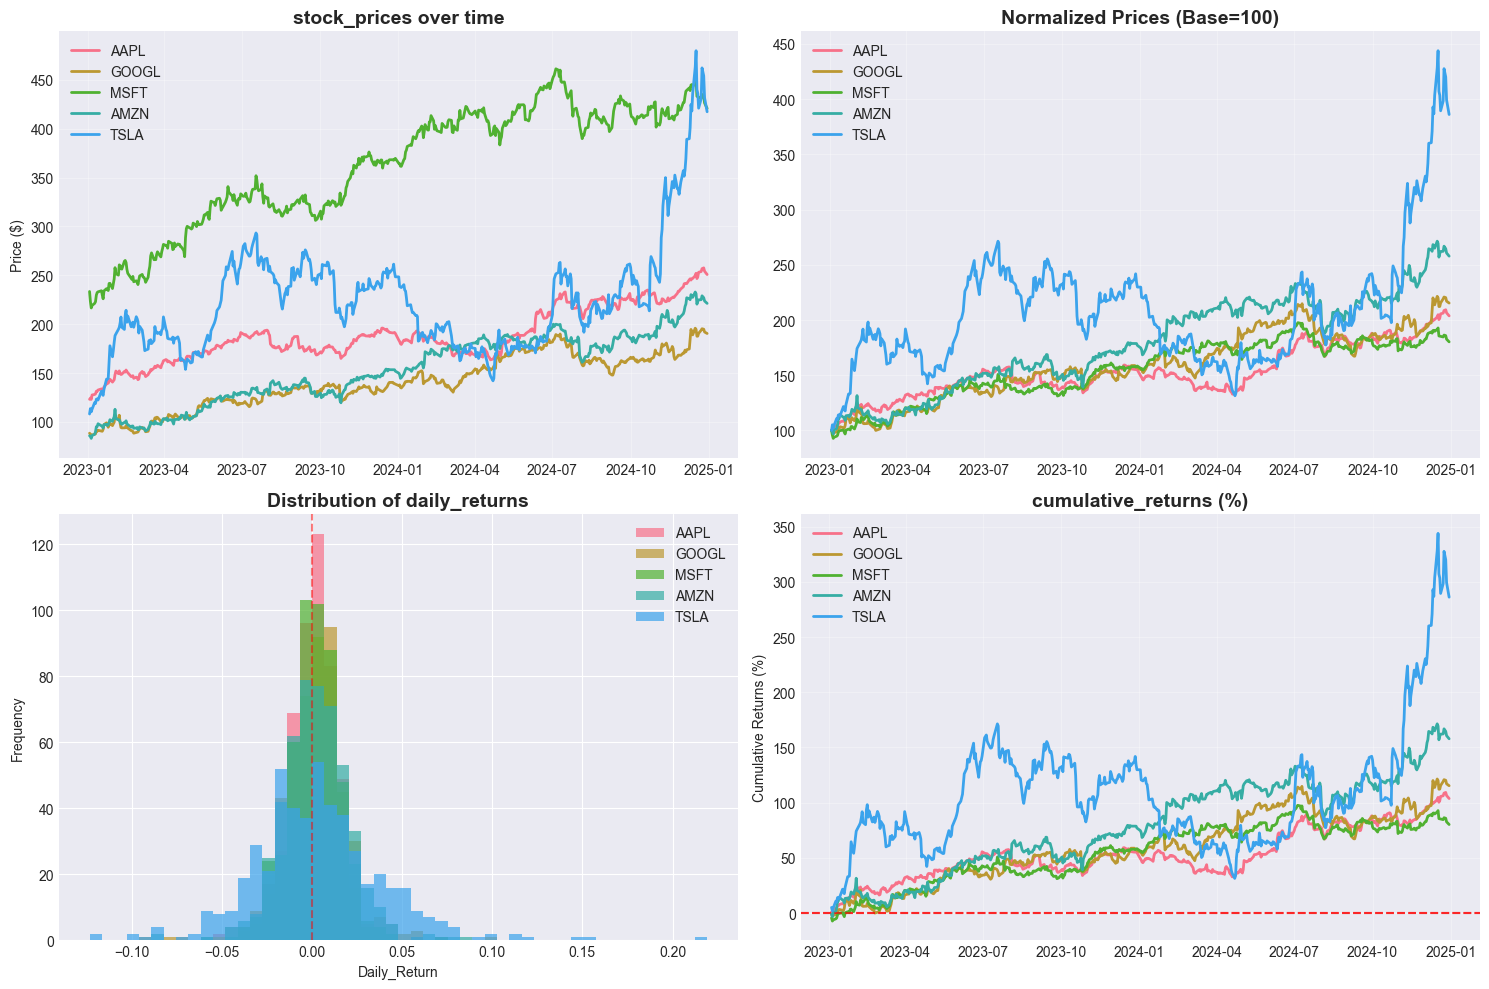

In [ ]:
# Generate Multiple visualizations
fig, axes = plt.subplots(2,2, figsize=(15, 10))

# Figure 1: Stock Prices over time
for col in stock_prices.columns:
    axes[0,0].plot(stock_prices.index, stock_prices[col], label=col, linewidth=2)
    axes[0,0].set_title('stock_prices over time', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Price ($)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)


# Plot 2: Normalized prices (shows relative performance)
normalized_prices = stock_prices / stock_prices.iloc[0] * 100
for col in normalized_prices.columns:
    axes[0, 1].plot(normalized_prices.index, normalized_prices[col], label=col, linewidth=2)
    axes[0,1].set_title('Normalized Prices (Base=100)', fontsize=14, fontweight='bold')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    
# Plot 3: Daily returns distribution
daily_returns.plot.hist(ax=axes[1,0], bins=50, alpha=0.7)
axes[1, 0].set_title('Distribution of daily_returns', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Daily_Return')
axes[1,0].set_ylabel('Frequency')
axes[1,0].axvline(x=0, color='red', linestyle='--', alpha=0.5)


# Plot 4: Cumulative returns
for col in cumulative_returns.columns:
    axes[1,1].plot(cumulative_returns.index, cumulative_returns[col] * 100, label=col, linewidth=2)
    axes[1,1].set_title('cumulative_returns (%)', fontsize=14, fontweight='bold')
    axes[1,1].set_ylabel('Cumulative Returns (%)')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].axhline(y=0, color='red', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.show


In [ ]:
# Calculate key Finance metrics
def calculate_finance_matrics(prices, daily_returns, risk_free_rate=0.02):
    """
    Calculate Advanced Financial Metrics
    """
    metrics = {}
    
    for symbol in prices.columns:
        stock_returns = daily_returns[symbol].dropna()
        
        
        # Annualized return
        annual_return = (1 + stock_returns.mean()) ** 252 - 1
        
        # Annualized volatility
        annual_vol = stock_returns.std() * np.sqrt(252)
        
        